In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# To remove warnings for certain cells

pd.options.mode.chained_assignment = None

#### Read in data file

In [358]:
# Read in combined delays file

delays = pd.read_parquet('../data/cleaned_delays_full.parquet')

In [359]:
# View first five rows

delays.head()

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,4,2019-12-19,AA,TPA,Tampa,Florida,DFW,Dallas/Fort Worth,Texas,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0
1,2019,12,1,2019-12-30,OO,MCI,Kansas City,Missouri,SLC,Salt Lake City,Utah,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0
2,2019,12,5,2019-12-13,DL,ATL,Atlanta,Georgia,SRQ,Sarasota/Bradenton,Florida,1938,1935,0.0,2106,2056,0.0,88.0,81.0,444.0,0,0,0,0,0
3,2019,12,4,2019-12-05,WN,LAX,Los Angeles,California,ELP,El Paso,Texas,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0
4,2019,12,3,2019-12-11,DL,RDU,Raleigh/Durham,North Carolina,BOS,Boston,Massachusetts,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0


#### Review summary statistics and outliers

In [360]:
# View size of the data frame

delays.shape

(14340049, 25)

In [361]:
# Confirm there are no null values

delays.isnull().sum()

year                   0
month                  0
day_of_week            0
fl_date                0
op_carrier             0
origin                 0
origin_city_name       0
origin_state_nm        0
dest                   0
dest_city_name         0
dest_state_nm          0
crs_dep_time           0
dep_time               0
dep_delay_new          0
crs_arr_time           0
arr_time               0
arr_delay_new          0
crs_elapsed_time       0
actual_elapsed_time    0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [362]:
# Review statistics

delays.describe().T

,count,mean,std,min,25%,50%,75%,max
year,14340049.0,2018.506848,0.499953,2018.0,2018.0,2019.0,2019.0,2019.0
month,14340049.0,6.591681,3.399153,1.0,4.0,7.0,10.0,12.0
day_of_week,14340049.0,3.938573,1.996209,1.0,2.0,4.0,6.0,7.0
crs_dep_time,14340049.0,1328.854950,491.854430,1.0,913.0,1320.0,1735.0,2359.0
dep_time,14340049.0,1334.068373,505.923864,1.0,915.0,1326.0,1745.0,2400.0
dep_delay_new,14340049.0,13.588767,45.705401,0.0,0.0,0.0,7.0,2710.0
crs_arr_time,14340049.0,1484.967639,519.737576,1.0,1100.0,1515.0,1919.0,2400.0
arr_time,14340049.0,1464.793872,539.819027,1.0,1047.0,1504.0,1916.0,2400.0
arr_delay_new,14340049.0,13.799981,45.640373,0.0,0.0,0.0,8.0,2695.0
crs_elapsed_time,14340049.0,141.754235,73.007000,-99.0,90.0,123.0,171.0,813.0


In [363]:
# Review flights where scheduled departure time = 1

pd.set_option('display.max_columns', None)

delays[delays['crs_dep_time'] == 1]

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
70826,2019,12,1,2019-12-02,AA,PHL,Philadelphia,Pennsylvania,ORD,Chicago,Illinois,1,45,44.0,127,148,21.0,146.0,123.0,678.0,1,0,0,0,1
187106,2019,12,7,2019-12-01,AA,PHL,Philadelphia,Pennsylvania,ORD,Chicago,Illinois,1,103,62.0,127,219,52.0,146.0,136.0,678.0,1,0,0,0,1
1468794,2019,10,3,2019-10-02,AA,PHX,Phoenix,Arizona,DCA,Washington,Virginia,1,2356,0.0,719,653,0.0,258.0,237.0,1979.0,0,0,0,0,0
1470917,2019,10,5,2019-10-04,UA,SFO,San Francisco,California,IAD,Washington,Virginia,1,2353,0.0,802,735,0.0,301.0,282.0,2419.0,0,0,0,0,0
1481649,2019,10,2,2019-10-01,AA,PHX,Phoenix,Arizona,DCA,Washington,Virginia,1,2356,0.0,719,655,0.0,258.0,239.0,1979.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042792,2018,1,2,2018-01-02,YV,DFW,Dallas/Fort Worth,Texas,CRP,Corpus Christi,Texas,1,127,86.0,120,241,81.0,79.0,74.0,354.0,0,1,0,0,0
14059082,2018,1,2,2018-01-02,EV,DFW,Dallas/Fort Worth,Texas,BTR,Baton Rouge,Louisiana,1,2400,0.0,119,105,0.0,78.0,65.0,383.0,0,0,0,0,0
14082919,2018,1,2,2018-01-02,AA,DFW,Dallas/Fort Worth,Texas,SAT,San Antonio,Texas,1,11,10.0,111,118,7.0,70.0,67.0,247.0,0,0,0,0,0
14153344,2018,1,2,2018-01-02,YV,DFW,Dallas/Fort Worth,Texas,HOU,Houston,Texas,1,12,11.0,109,107,0.0,68.0,55.0,247.0,0,0,0,0,0


In [364]:
# Review flights where departure delay > 2500

delays[delays['dep_delay_new'] > 2500]

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
462644,2019,12,4,2019-12-12,OO,SYR,Syracuse,New York,ORD,Chicago,Illinois,1511,1221,2710.0,1632,1327,2695.0,141.0,126.0,607.0,1,0,0,0,0
6511941,2019,2,7,2019-02-17,MQ,DTW,Detroit,Michigan,LGA,New York,New York,1728,1400,2672.0,1922,1531,2649.0,114.0,91.0,502.0,1,0,0,0,1
10769269,2018,7,4,2018-07-05,OO,CLT,Charlotte,North Carolina,JFK,New York,New York,1123,833,2710.0,1329,1021,2692.0,126.0,108.0,541.0,0,1,0,0,0


In [365]:
# Review flights were elapsed time is negative

delays[delays['crs_elapsed_time'] < 0]

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
9040982,2018,10,2,2018-10-09,YX,ORD,Chicago,Illinois,TVC,Traverse City,Michigan,2120,604,524.0,2336,804,508.0,-99.0,60.0,224.0,0,1,0,0,0


This value seems incorrect, given the large size of the data set we will remove this row

In [366]:
delays = delays[delays['crs_elapsed_time'] > 0]
delays.reset_index(inplace = True, drop = True)

In [367]:
# Review flights under 15 minutes

delays[delays['actual_elapsed_time'] < 15]

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
8709600,2018,10,1,2018-10-15,AS,WRG,Wrangell,Alaska,PSG,Petersburg,Alaska,1104,1058,0.0,1125,1112,0.0,21.0,14.0,31.0,0,0,0,0,0
11295058,2018,6,4,2018-06-21,AS,WRG,Wrangell,Alaska,PSG,Petersburg,Alaska,1036,1024,0.0,1058,1038,0.0,22.0,14.0,31.0,0,0,0,0,0


These destinations are only 47 miles apart so this seems reasonable

In [368]:
# Review flights over 800 minutes (13 hours)

delays[delays['actual_elapsed_time'] > 800]

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5791421,2019,3,3,2019-03-27,EV,JAX,Jacksonville,Florida,EWR,Newark,New Jersey,800,1216,0.0,1036,1035,1439.0,156.0,1604.0,820.0,0,0,1,0,1


It does not seem reasonable that this flight took over 26 hours so I will remove this row

In [369]:
delays = delays[delays['actual_elapsed_time'] < 800]

In [370]:
# Review flights under 35 miles

delays[delays['distance'] < 35]['origin_city_name'].value_counts()

Wrangell      708
Petersburg    708
Name: origin_city_name, dtype: int64

In [371]:
delays[delays['distance'] < 35]['dest_city_name'].value_counts()

Wrangell      708
Petersburg    708
Name: dest_city_name, dtype: int64

As discussed above these cities are only 47 miles apart (on the ground) so this seems reasonable

In [372]:
# Review flights over 5000 miles

delays[delays['distance'] > 5000]['origin_city_name'].value_counts()

Honolulu    210
Boston      208
Name: origin_city_name, dtype: int64

In [373]:
delays[delays['distance'] > 5000]['dest_city_name'].value_counts()

Boston      210
Honolulu    208
Name: dest_city_name, dtype: int64

As Boston and Honolulu are more than 5000 miles apart this seems reasonable

#### Create Flight Delay variable

In [374]:
# Add flight status field (where flight delay = 1 when number of minutes is greater than 0)

delays['flight_delay'] = delays['arr_delay_new'].apply(lambda x: 1 if x > 0 else 0)
delays['flight_delay'] = delays['flight_delay'].astype(int)

In [375]:
delays.head()

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,4,2019-12-19,AA,TPA,Tampa,Florida,DFW,Dallas/Fort Worth,Texas,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0,1
1,2019,12,1,2019-12-30,OO,MCI,Kansas City,Missouri,SLC,Salt Lake City,Utah,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0,0
2,2019,12,5,2019-12-13,DL,ATL,Atlanta,Georgia,SRQ,Sarasota/Bradenton,Florida,1938,1935,0.0,2106,2056,0.0,88.0,81.0,444.0,0,0,0,0,0,0
3,2019,12,4,2019-12-05,WN,LAX,Los Angeles,California,ELP,El Paso,Texas,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0,0
4,2019,12,3,2019-12-11,DL,RDU,Raleigh/Durham,North Carolina,BOS,Boston,Massachusetts,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0,0


In [376]:
# Figure out proportion of delayed flights

delays['flight_delay'].value_counts(normalize = True)

0    0.650194
1    0.349806
Name: flight_delay, dtype: float64

#### EDA on Flights and Delays

In [377]:
# Review unique airline carriers

delays['op_carrier'].value_counts()

WN    2659171
DL    1931862
AA    1823769
OO    1576635
UA    1233622
YX     625865
MQ     599155
B6     590482
OH     547431
AS     503994
9E     484163
YV     429680
NK     375020
EV     324762
F9     250584
G4     199635
HA     167064
VX      17153
Name: op_carrier, dtype: int64

In [378]:
# Create dictionary for airline names

airline_dict = {
    '9E' : 'Endeavor',
    'AA' : 'American',
    'AS' : 'Alaska',
    'B6' : 'Jetblue',
    'DL' : 'Delta',
    'EV' : 'ExpressJet',
    'F9' : 'Frontier',
    'G4' : 'Allegiant',
    'HA' : 'Hawaiian',
    'MQ' : 'Envoy',
    'NK' : 'Spirit',
    'OH' : 'PSA',
    'OO' : 'Skywest',
    'UA' : 'United',
    'VX' : 'Virgin',
    'WN' : 'Southwest',
    'YV' : 'Mesa',
    'YX' : 'Republic'    
}

In [379]:
# Map airlines to human readable names

delays.replace({'op_carrier': airline_dict}, inplace = True)

In [450]:
# Create a dataframe of airines to export for streamlit

airlines_list = list(delays['op_carrier'].unique())
airlines_df = pd.DataFrame(airlines_list, columns = ['airports'])
airlines_df.to_csv('../data/airlines.csv', index = False)

In [380]:
# Find the counts of the origin airports

delays['origin'].value_counts()

ATL    777363
ORD    652966
DFW    568814
DEN    480218
CLT    458037
        ...  
DLG       163
BFM       150
AKN       123
IFP        45
YNG         2
Name: origin, Length: 363, dtype: int64

In [381]:
# Find the counts of the destination airports

delays['dest'].value_counts()

ATL    777673
ORD    651853
DFW    566873
DEN    479542
CLT    456836
        ...  
DLG       163
BFM       154
AKN       124
IFP        45
YNG         2
Name: dest, Length: 363, dtype: int64

In [382]:
# Find the top 100 origin airports

top_100_origin = delays['origin'].value_counts().sort_values(ascending = False)[0:100]
top_origin_airports = list(top_100_origin.index)

In [435]:
# Create a dataframe of origin airports to export for streamlit

top_origin_df = pd.DataFrame(top_origin_airports, columns=['airport'])
top_origin_df.to_csv('../data/origin_airports.csv', index = False)

In [383]:
# Find the top 100 destination airports

top_100_destination = delays['dest'].value_counts().sort_values(ascending = False)[0:100]
top_dest_airports = list(top_100_destination.index)

In [438]:
# Create a dataframe of destination airports to export for streamlit

top_dest_df = pd.DataFrame(top_dest_airports, columns=['airport'])
top_dest_df.to_csv('../data/dest_airports.csv', index = False)

In [384]:
# Subset the data to only include the top 100 origin and destination airports

delays = delays[(delays['origin'].isin(top_origin_airports)) & (delays['dest'].isin(top_dest_airports))]
delays.reset_index(drop = True, inplace = True)

In [385]:
delays.shape

(11887768, 26)

In [386]:
delays.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11887768.0,2018.505324,0.499972,2018.0,2018.0,2019.0,2019.0,2019.0
month,11887768.0,6.585318,3.403447,1.0,4.0,7.0,10.0,12.0
day_of_week,11887768.0,3.934707,1.995550,1.0,2.0,4.0,6.0,7.0
crs_dep_time,11887768.0,1328.179131,493.482900,1.0,906.0,1320.0,1736.0,2359.0
dep_time,11887768.0,1333.412144,508.088316,1.0,909.0,1325.0,1747.0,2400.0
dep_delay_new,11887768.0,13.500784,44.024858,0.0,0.0,0.0,7.0,2710.0
crs_arr_time,11887768.0,1487.137369,525.372600,1.0,1100.0,1517.0,1924.0,2400.0
arr_time,11887768.0,1465.590071,546.185581,1.0,1046.0,1507.0,1921.0,2400.0
arr_delay_new,11887768.0,13.625505,43.956051,0.0,0.0,0.0,8.0,2695.0
crs_elapsed_time,11887768.0,150.583684,75.154485,1.0,95.0,133.0,181.0,705.0


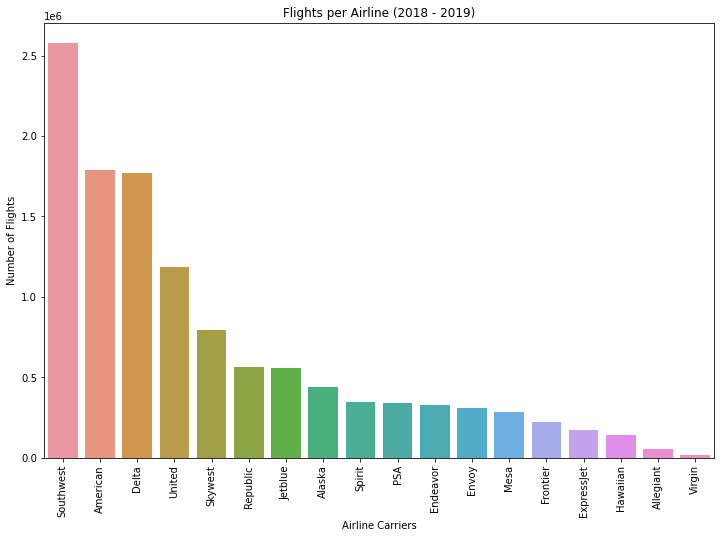

In [387]:
# View number of flights per airline

plt.figure(figsize = (12,8))

sns.countplot(x = delays['op_carrier'], 
              data = delays, 
              order = delays['op_carrier'].value_counts().index)

plt.xticks(rotation = 90)
plt.title('Flights per Airline (2018 - 2019)')
plt.xlabel('Airline Carriers')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_airline.png');

In [388]:
# Create a dataframe with just delayed flights

delays_only = delays[delays['flight_delay'] == 1]

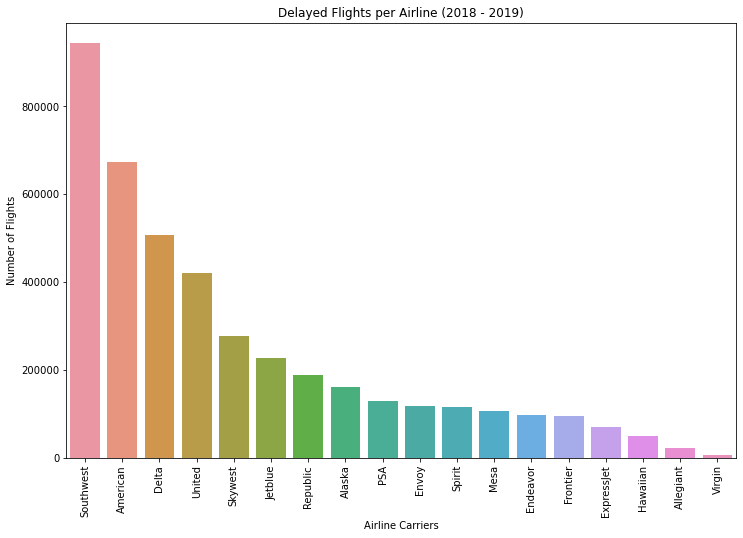

In [389]:
# View number of delayed flights per airline

plt.figure(figsize = (12,8))

sns.countplot(x = delays_only['op_carrier'], 
              data = delays_only, 
              order = delays_only['op_carrier'].value_counts().index)

plt.xticks(rotation = 90)
plt.title('Delayed Flights per Airline (2018 - 2019)')
plt.xlabel('Airline Carriers')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_airline_delayed.png');

In [390]:
# Rename flight delay column for graphs

rename_dict = {0: 'Not Delayed', 1: 'Delayed'}

delays_rename = delays.replace({'flight_delay': rename_dict})
delays_rename['Flight Delay'] = delays_rename['flight_delay']

In [391]:
pd.Categorical(delays_rename['op_carrier'], ['Southwest', 'American', 'Delta', 'United', 'Skywest', 'Republic',
       'Jetblue', 'Alaska', 'Spirit', 'PSA', 'Endeavor', 'Envoy', 'Mesa',
       'Frontier', 'ExpressJet', 'Hawaiian', 'Allegiant', 'Virgin'])

['American', 'Skywest', 'Southwest', 'Delta', 'United', ..., 'Jetblue', 'Endeavor', 'Southwest', 'Delta', 'American']
Length: 11887768
Categories (18, object): ['Southwest', 'American', 'Delta', 'United', ..., 'ExpressJet', 'Hawaiian', 'Allegiant', 'Virgin']

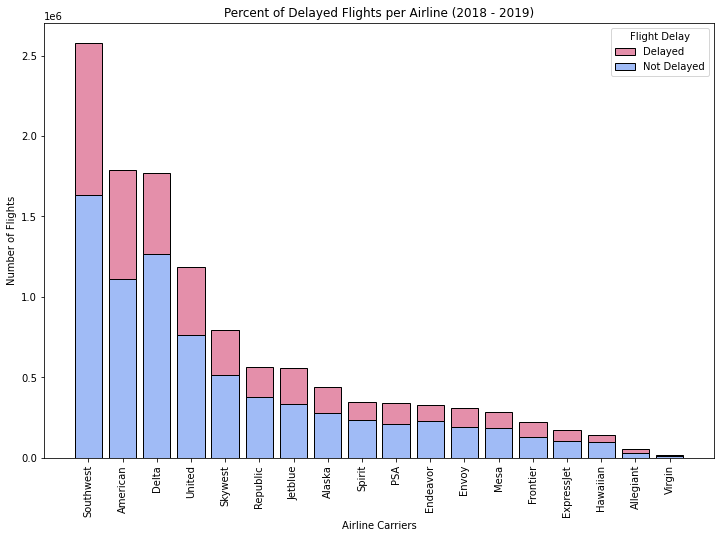

In [395]:
# View number of delayed flights per airline

delays_rename['op_carrier'] = pd.Categorical(delays_rename['op_carrier'], ['Southwest', 'American', 'Delta', 'United', 'Skywest', 'Republic',
       'Jetblue', 'Alaska', 'Spirit', 'PSA', 'Endeavor', 'Envoy', 'Mesa',
       'Frontier', 'ExpressJet', 'Hawaiian', 'Allegiant', 'Virgin'])

plt.figure(figsize = (12,8))

sns.histplot(x = delays_rename['op_carrier'], 
            hue = delays_rename['Flight Delay'],
            hue_order = ['Delayed', 'Not Delayed'],
            data = delays_rename,
            multiple = 'stack',
            palette = ['#dc6a8e', '#80a5f4'],
            shrink = 0.8);

plt.xticks(rotation = 90)
plt.title('Percent of Delayed Flights per Airline (2018 - 2019)')
plt.xlabel('Airline Carriers')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_airline_delayed_percent.png');

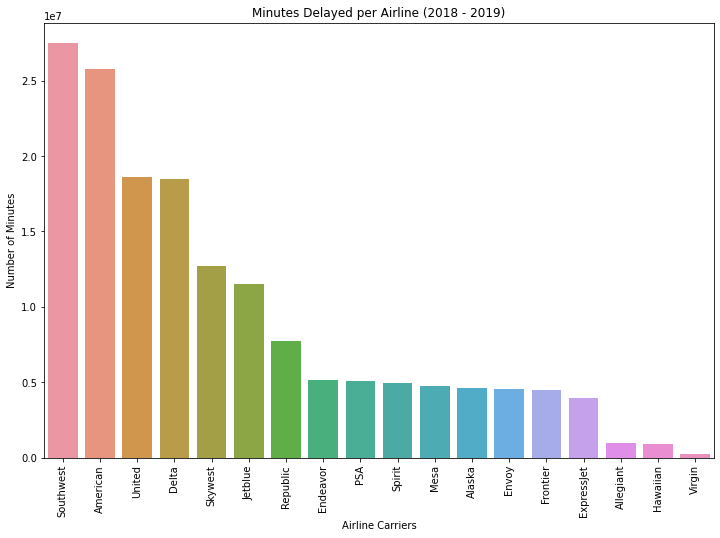

In [396]:
# View minutes of delayed flights per airline

plt.figure(figsize = (12,8))

sns.barplot(x = 'op_carrier', 
            y = 'arr_delay_new',
            data = delays,
            estimator = sum,
            ci = None,
            order = delays.groupby('op_carrier')['arr_delay_new'].sum().sort_values(ascending = False).index)

plt.xticks(rotation = 90)
plt.title('Minutes Delayed per Airline (2018 - 2019)')
plt.xlabel('Airline Carriers')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_airline_delayed_minutes.png');

In [269]:
delays.groupby('op_carrier')['arr_delay_new'].sum().sort_values(ascending = False).index

Index(['Southwest', 'American', 'United', 'Delta', 'Skywest', 'Jetblue',
       'Republic', 'Endeavor', 'PSA', 'Spirit', 'Mesa', 'Alaska', 'Envoy',
       'Frontier', 'ExpressJet', 'Allegiant', 'Hawaiian', 'Virgin'],
      dtype='object', name='op_carrier')

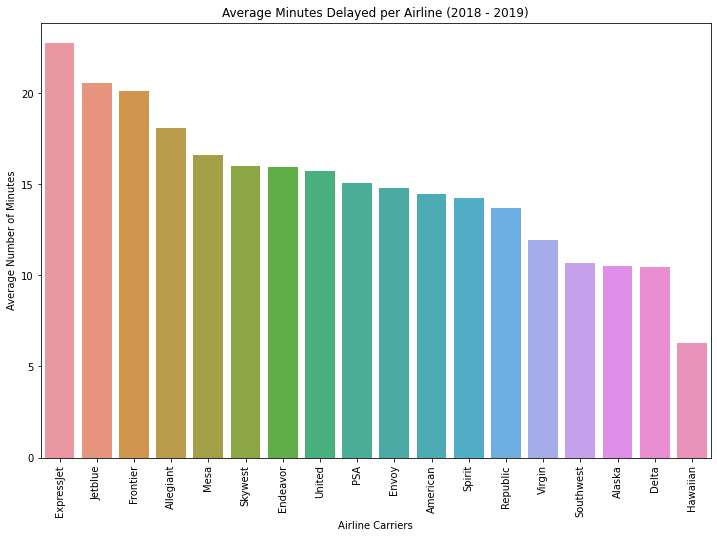

In [397]:
# View average minutes of delayed flights per airline

plt.figure(figsize = (12,8))

sns.barplot(x = 'op_carrier', 
            y = 'arr_delay_new',
            data = delays,
            estimator = np.mean,
            ci = None,
            order = delays.groupby('op_carrier')['arr_delay_new'].mean().sort_values(ascending = False).index)

plt.xticks(rotation = 90)
plt.title('Average Minutes Delayed per Airline (2018 - 2019)')
plt.xlabel('Airline Carriers')
plt.ylabel('Average Number of Minutes')
plt.savefig('../images/flights_airline_delayed_average.png');

In [272]:
delays.groupby('op_carrier')['arr_delay_new'].mean().sort_values(ascending = False).index

Index(['ExpressJet', 'Jetblue', 'Frontier', 'Allegiant', 'Mesa', 'Skywest',
       'Endeavor', 'United', 'PSA', 'Envoy', 'American', 'Spirit', 'Republic',
       'Virgin', 'Southwest', 'Alaska', 'Delta', 'Hawaiian'],
      dtype='object', name='op_carrier')

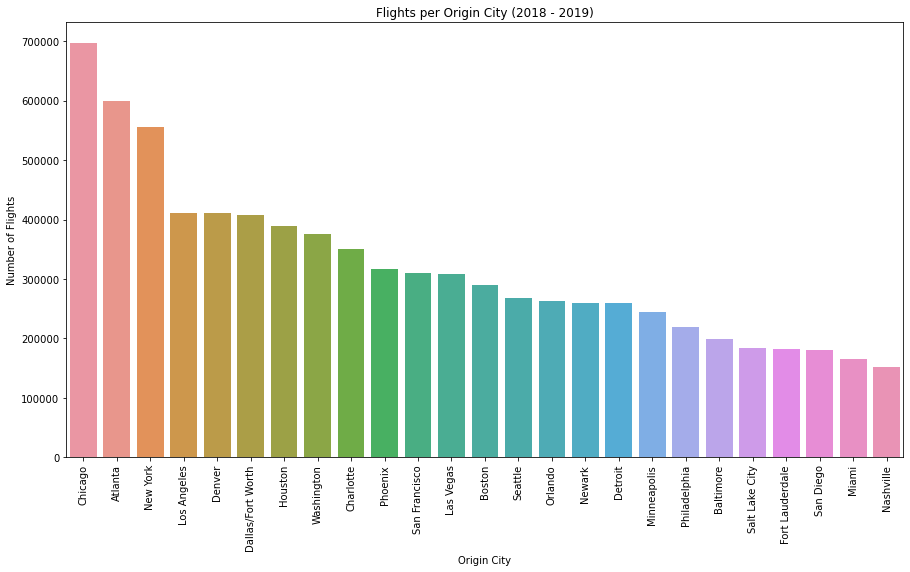

In [417]:
# View number of flights from origin cities

plt.figure(figsize = (15,8))

sns.countplot(x = delays['origin_city_name'], 
              data = delays, 
              order = delays['origin_city_name'].value_counts()[0:25].index)

plt.xticks(rotation = 90)
plt.title('Flights per Origin City (2018 - 2019)')
plt.xlabel('Origin City')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_origin_city.png', bbox_inches='tight', pad_inches = 1);

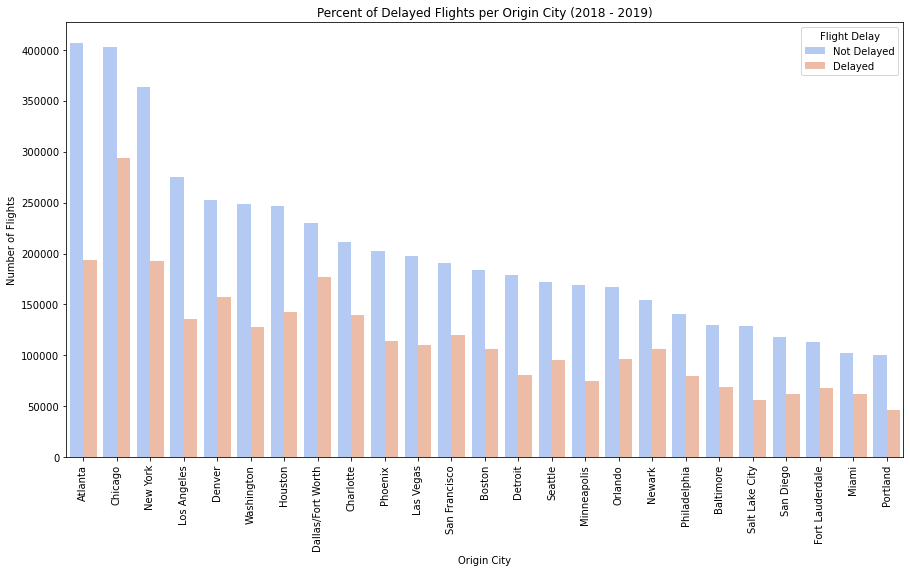

In [418]:
# View percent of delayed flights from origin cities

plt.figure(figsize = (15,8))

sns.countplot(x = delays_rename['origin_city_name'],
              hue = delays_rename['Flight Delay'],
              hue_order = ['Not Delayed', 'Delayed'], 
              data = delays_rename, 
              order = delays_rename.groupby('flight_delay')['origin_city_name'].value_counts()[95:120].index.get_level_values(1),
              palette = 'coolwarm')

plt.xticks(rotation = 90)
plt.title('Percent of Delayed Flights per Origin City (2018 - 2019)')
plt.xlabel('Origin City')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_origin_city_delayed.png', bbox_inches='tight', pad_inches = 1);

In [347]:
delays_rename.groupby('flight_delay')['origin_city_name'].value_counts()[95:120].index.get_level_values(1)

Index(['Atlanta', 'Chicago', 'New York', 'Los Angeles', 'Denver', 'Washington',
       'Houston', 'Dallas/Fort Worth', 'Charlotte', 'Phoenix', 'Las Vegas',
       'San Francisco', 'Boston', 'Detroit', 'Seattle', 'Minneapolis',
       'Orlando', 'Newark', 'Philadelphia', 'Baltimore', 'Salt Lake City',
       'San Diego', 'Fort Lauderdale', 'Miami', 'Portland'],
      dtype='object', name='origin_city_name')

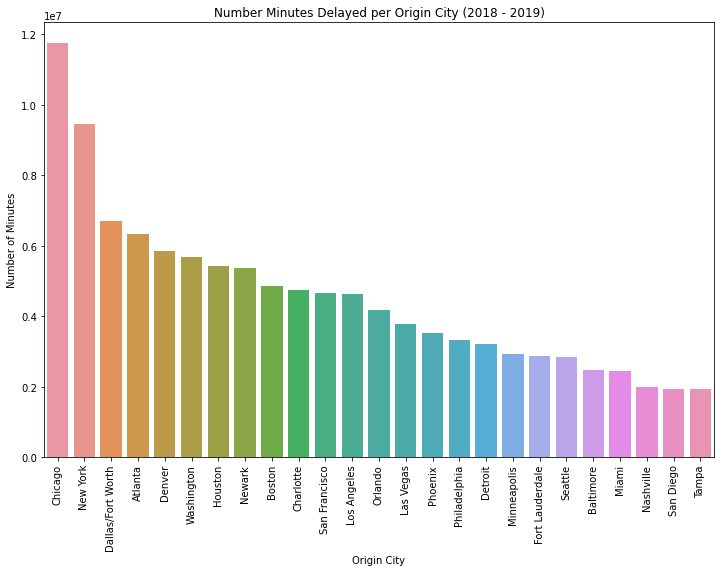

In [419]:
# View number minutes of delayed flights per origin city

plt.figure(figsize = (12,8))

sns.barplot(x = 'origin_city_name', 
            y = 'arr_delay_new',
            data = delays,
            estimator = sum,
            ci = None,
            order = delays.groupby('origin_city_name')['arr_delay_new'].sum().sort_values(ascending = False)[0:25].index)

plt.xticks(rotation = 90)
plt.title('Number Minutes Delayed per Origin City (2018 - 2019)')
plt.xlabel('Origin City')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_origin_city_delayed_minutes.png', bbox_inches='tight', pad_inches = 1);

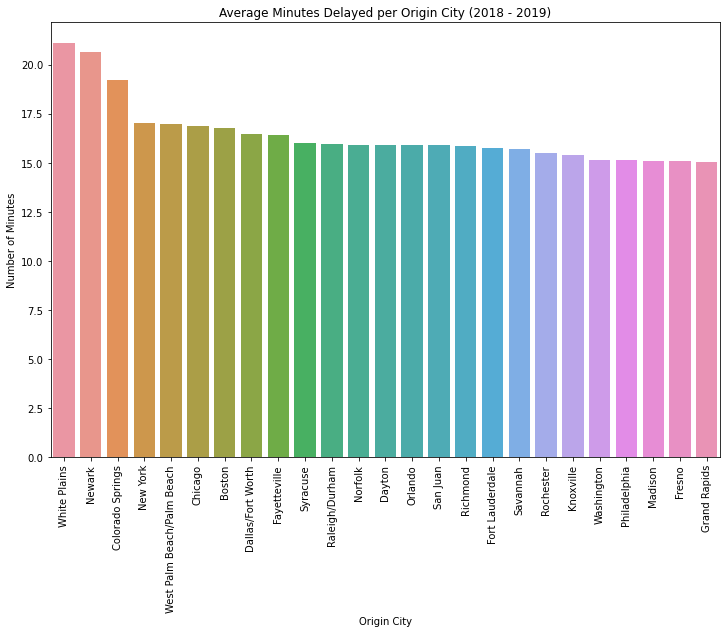

In [420]:
# View average minutes of delayed flights per origin city

plt.figure(figsize = (12,8))

sns.barplot(x = 'origin_city_name', 
            y = 'arr_delay_new',
            data = delays,
            estimator = np.mean,
            ci = None,
            order = delays.groupby('origin_city_name')['arr_delay_new'].mean().sort_values(ascending = False)[0:25].index)

plt.xticks(rotation = 90)
plt.title('Average Minutes Delayed per Origin City (2018 - 2019)')
plt.xlabel('Origin City')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_origin_city_delayed_average.png', bbox_inches='tight', pad_inches = 1);

In [266]:
delays.groupby('origin_city_name')['arr_delay_new'].sum().sort_values(ascending = False)[0:25].index

Index(['Chicago', 'New York', 'Dallas/Fort Worth', 'Atlanta', 'Denver',
       'Washington', 'Houston', 'Newark', 'Boston', 'Charlotte',
       'San Francisco', 'Los Angeles', 'Orlando', 'Las Vegas', 'Phoenix',
       'Philadelphia', 'Detroit', 'Minneapolis', 'Fort Lauderdale', 'Seattle',
       'Baltimore', 'Miami', 'Nashville', 'San Diego', 'Tampa'],
      dtype='object', name='origin_city_name')

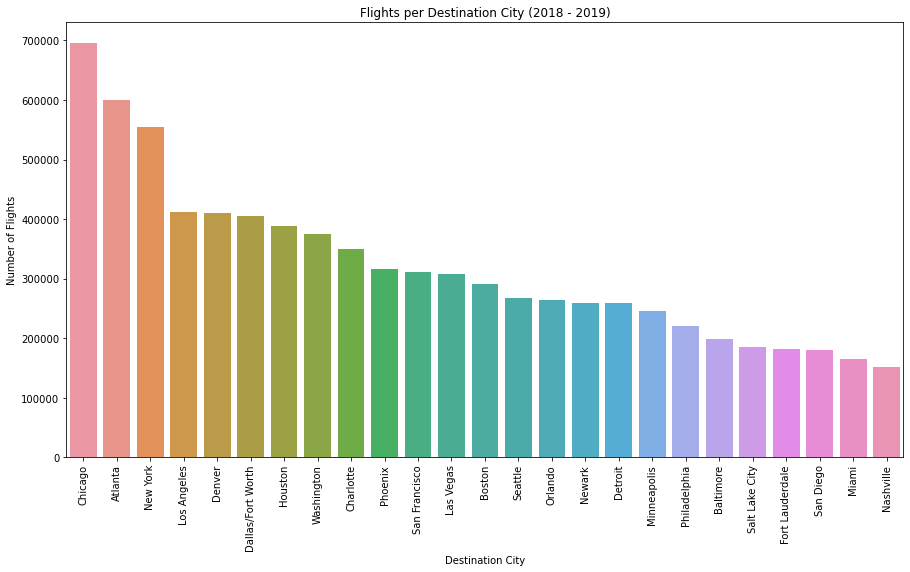

In [421]:
# View number of flights to destination cities

plt.figure(figsize = (15,8))

sns.countplot(x = delays['dest_city_name'], 
              data = delays, 
              order = delays['dest_city_name'].value_counts()[0:25].index)

plt.xticks(rotation = 90)
plt.title('Flights per Destination City (2018 - 2019)')
plt.xlabel('Destination City')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_dest_city.png', bbox_inches='tight', pad_inches = 1);

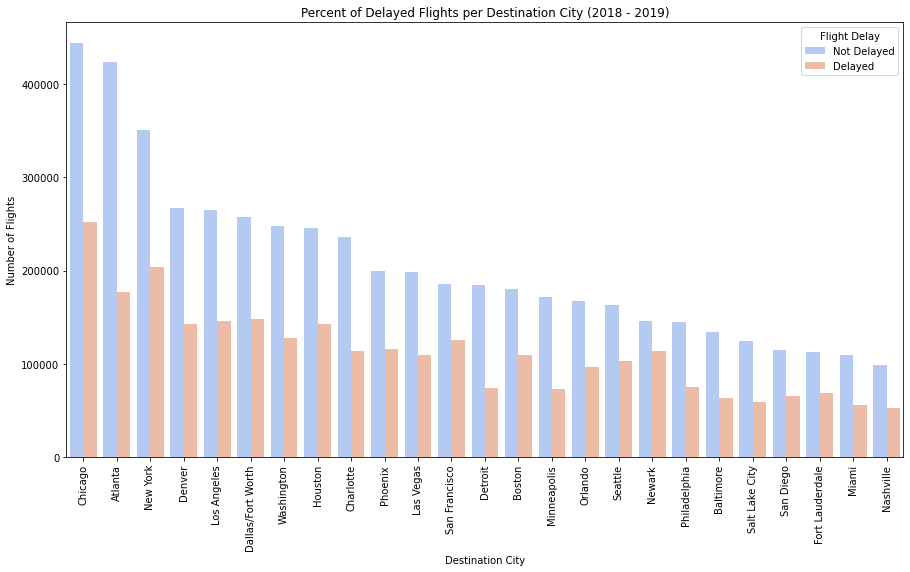

In [422]:
# View percent of delayed flights to destination cities

plt.figure(figsize = (15,8))

sns.countplot(x = delays_rename['dest_city_name'],
              hue = delays_rename['Flight Delay'],
              hue_order = ['Not Delayed', 'Delayed'], 
              data = delays_rename, 
              order = delays_rename.groupby('flight_delay')['dest_city_name'].value_counts()[95:120].index.get_level_values(1),
              palette = 'coolwarm')

plt.xticks(rotation = 90)
plt.title('Percent of Delayed Flights per Destination City (2018 - 2019)')
plt.xlabel('Destination City')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_dest_city_delayed.png', bbox_inches='tight', pad_inches = 1);

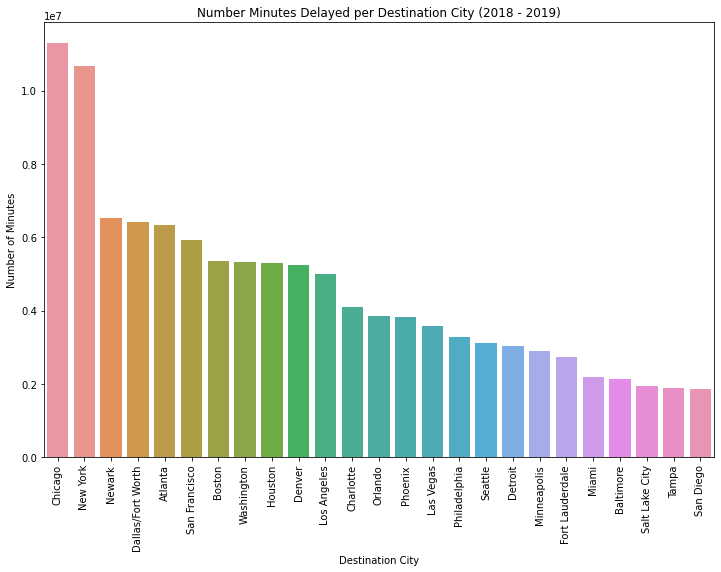

In [423]:
# View number minutes of delayed flights per destination city

plt.figure(figsize = (12,8))

sns.barplot(x = 'dest_city_name', 
            y = 'arr_delay_new',
            data = delays,
            estimator = sum,
            ci = None,
           order = delays.groupby('dest_city_name')['arr_delay_new'].sum().sort_values(ascending = False)[0:25].index)

plt.xticks(rotation = 90)
plt.title('Number Minutes Delayed per Destination City (2018 - 2019)')
plt.xlabel('Destination City')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_dest_city_delayed_minutes.png', bbox_inches='tight', pad_inches = 1);

In [281]:
delays.groupby('dest_city_name')['arr_delay_new'].sum().sort_values(ascending = False)[0:25].index

Index(['Chicago', 'New York', 'Newark', 'Dallas/Fort Worth', 'Atlanta',
       'San Francisco', 'Boston', 'Washington', 'Houston', 'Denver',
       'Los Angeles', 'Charlotte', 'Orlando', 'Phoenix', 'Las Vegas',
       'Philadelphia', 'Seattle', 'Detroit', 'Minneapolis', 'Fort Lauderdale',
       'Miami', 'Baltimore', 'Salt Lake City', 'Tampa', 'San Diego'],
      dtype='object', name='dest_city_name')

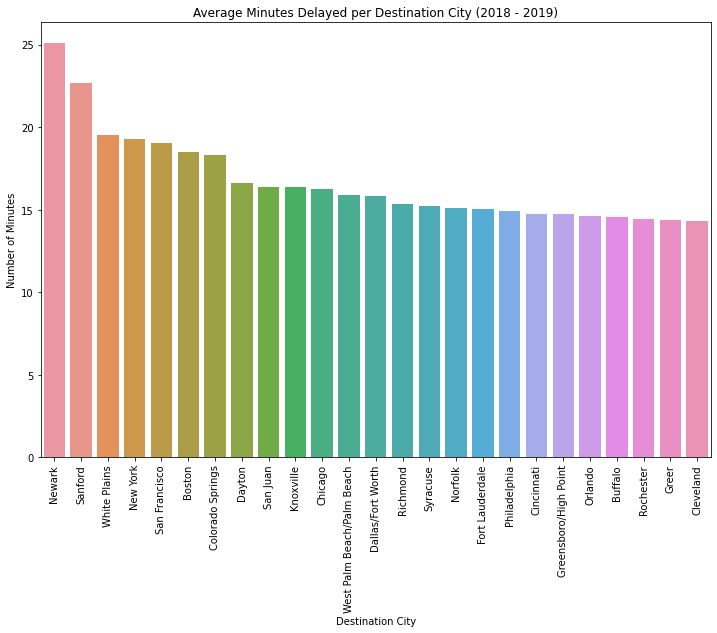

In [424]:
# View average minutes of delayed flights per destination city

plt.figure(figsize = (12,8))

sns.barplot(x = 'dest_city_name', 
            y = 'arr_delay_new',
            data = delays,
            estimator = np.mean,
            ci = None,
            order = delays.groupby('dest_city_name')['arr_delay_new'].mean().sort_values(ascending = False)[0:25].index)

plt.xticks(rotation = 90)
plt.title('Average Minutes Delayed per Destination City (2018 - 2019)')
plt.xlabel('Destination City')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_dest_city_delayed_average.png', bbox_inches='tight', pad_inches = 1);

In [283]:
# Convert month to human readable form

month_dict = {
    1  : 'January',
    2  : 'February',
    3  : 'March',
    4  : 'April',
    5  : 'May',
    6  : 'June',
    7  : 'July',
    8  : 'August',
    9  : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

In [286]:
delays_months = delays_rename.replace({'month': month_dict})

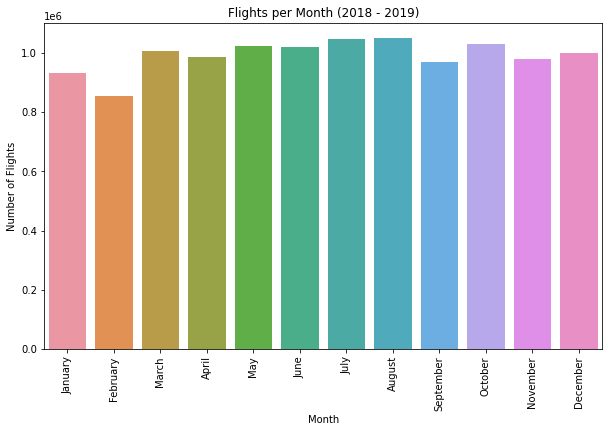

In [425]:
# Flights per month of travel

plt.figure(figsize = (10,6))

sns.countplot(x = delays_months['month'], 
              data = delays_months,
             order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                     'September', 'October', 'November', 'December'])

plt.xticks(rotation = 90)
plt.title('Flights per Month (2018 - 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_month.png', bbox_inches='tight', pad_inches = 1);

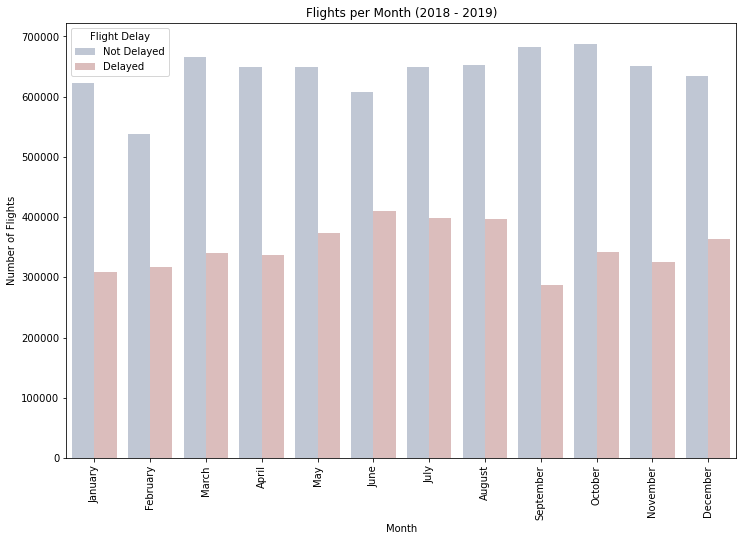

In [426]:
# View percent of delayed flights per month

plt.figure(figsize = (12,8))

sns.countplot(x = delays_months['month'],
              hue = delays_months['Flight Delay'],
              hue_order = ['Not Delayed', 'Delayed'],
              data = delays_months,
             order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                     'September', 'October', 'November', 'December'],
             palette = 'vlag')

plt.xticks(rotation = 90)
plt.title('Flights per Month (2018 - 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_month_delayed.png', bbox_inches='tight', pad_inches = 1);

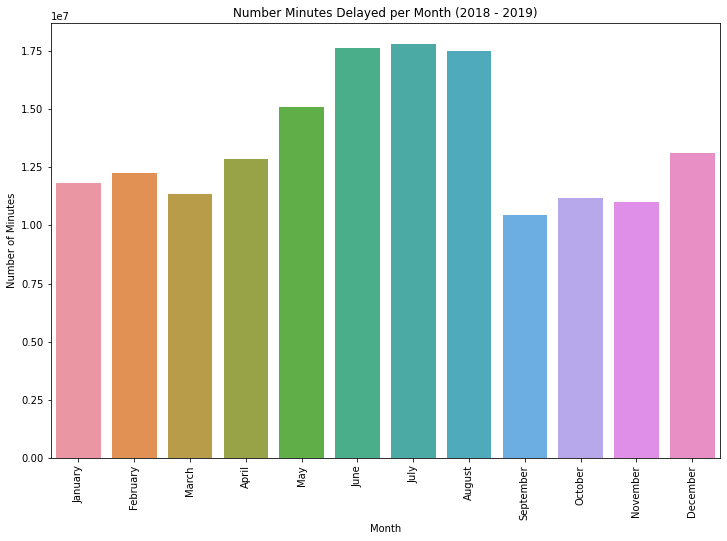

In [427]:
# View number minutes of delayed flights per month

plt.figure(figsize = (12,8))

sns.barplot(x = 'month', 
            y = 'arr_delay_new',
            data = delays_months,
            estimator = sum,
            ci = None,
            order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December'])

plt.xticks(rotation = 90)
plt.title('Number Minutes Delayed per Month (2018 - 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_month_delayed_minutes.png', bbox_inches='tight', pad_inches = 1);

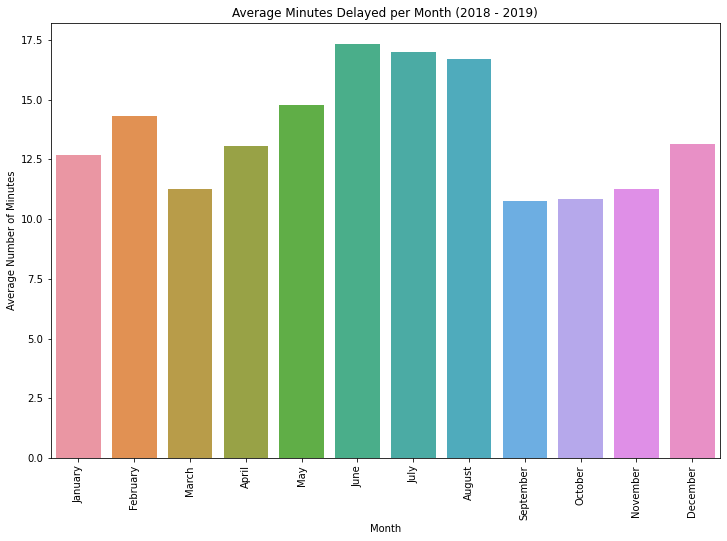

In [428]:
# View average minutes of delayed flights per month

plt.figure(figsize = (12,8))

sns.barplot(x = 'month', 
            y = 'arr_delay_new',
            data = delays_months,
            estimator = np.mean,
            ci = None,
            order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December'])

plt.xticks(rotation = 90)
plt.title('Average Minutes Delayed per Month (2018 - 2019)')
plt.xlabel('Month')
plt.ylabel('Average Number of Minutes')
plt.savefig('../images/flights_month_delayed_average.png', bbox_inches='tight', pad_inches = 1);

In [289]:
# Convert day to human readable form

day_dict = {
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday',
    7 : 'Sunday'
}

In [290]:
delays_days = delays_rename.replace({'day_of_week': day_dict})

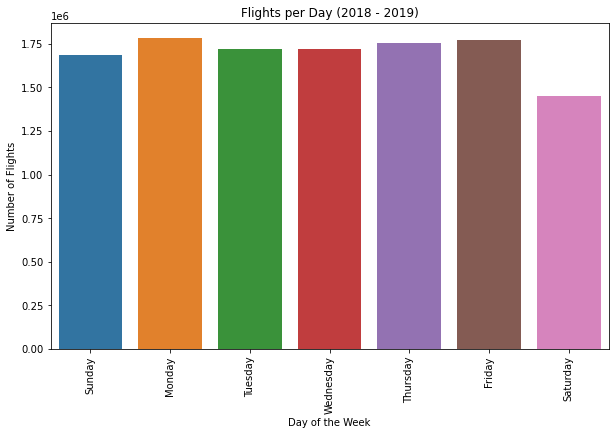

In [429]:
# Flights per day of travel

plt.figure(figsize = (10,6))

sns.countplot(x = delays_days['day_of_week'], 
              data = delays_days,
             order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.xticks(rotation = 90)
plt.title('Flights per Day (2018 - 2019)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_day.png', bbox_inches='tight', pad_inches = 1);

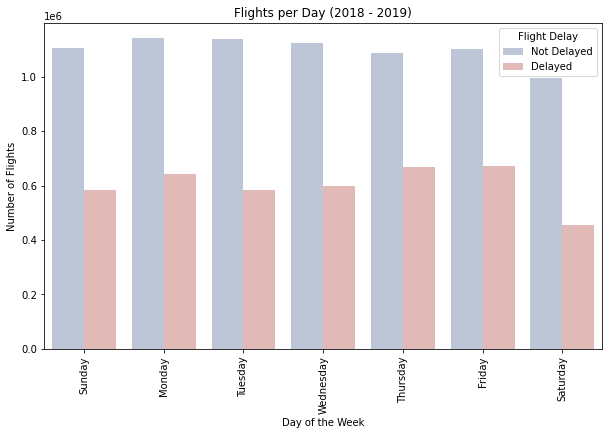

In [430]:
# Flight delays per day of travel

plt.figure(figsize = (10,6))

sns.countplot(x = delays_days['day_of_week'], 
              hue = delays_days['Flight Delay'],
              hue_order = ['Not Delayed', 'Delayed'],
              data = delays_days,
              order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
              palette = 'vlag',
              saturation = 1)

plt.xticks(rotation = 90)
plt.title('Flights per Day (2018 - 2019)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.savefig('../images/flights_day_delay.png', bbox_inches='tight', pad_inches = 1);

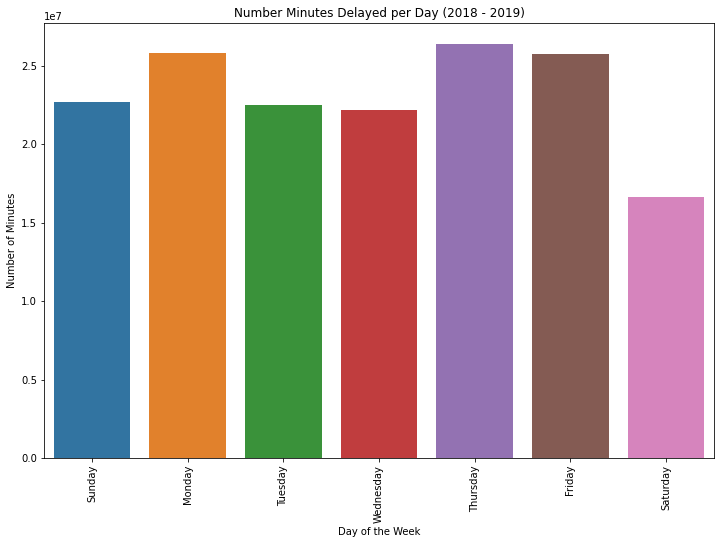

In [431]:
# View number minutes of delayed flights per day

plt.figure(figsize = (12,8))

sns.barplot(x = 'day_of_week', 
            y = 'arr_delay_new',
            data = delays_days,
            estimator = sum,
            ci = None,
            order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.xticks(rotation = 90)
plt.title('Number Minutes Delayed per Day (2018 - 2019)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Minutes')
plt.savefig('../images/flights_day_delayed_minutes.png', bbox_inches='tight', pad_inches = 1);

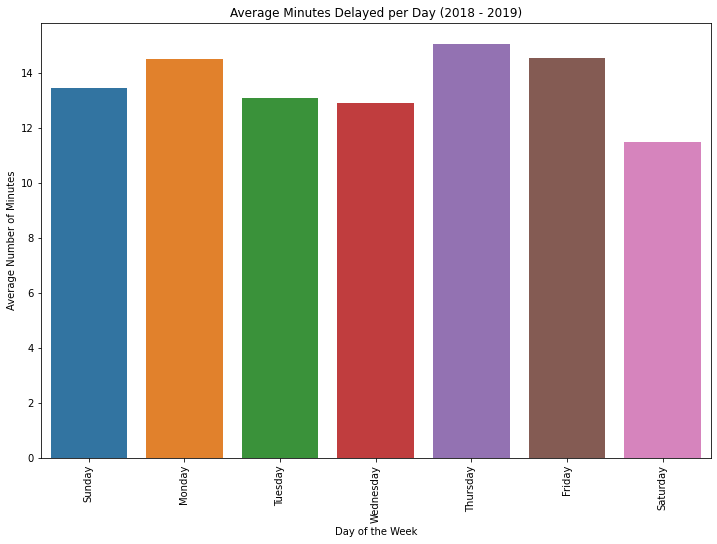

In [432]:
# View average minutes of delayed flights per day

plt.figure(figsize = (12,8))

sns.barplot(x = 'day_of_week', 
            y = 'arr_delay_new',
            data = delays_days,
            estimator = np.mean,
            ci = None,
            order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.xticks(rotation = 90)
plt.title('Average Minutes Delayed per Day (2018 - 2019)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Minutes')
plt.savefig('../images/flights_day_delayed_average.png', bbox_inches='tight', pad_inches = 1);

In [300]:
grouped_df = delays.groupby('op_carrier')
grouped_df = grouped_df.agg({'origin_city_name': 'nunique'})
grouped_df = grouped_df.reset_index()

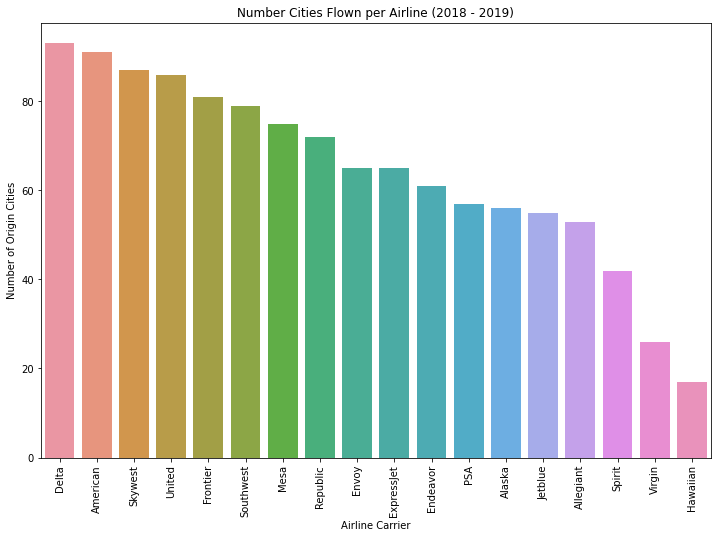

In [414]:
# View number of cities per airline

plt.figure(figsize = (12,8))

sns.barplot(x = 'op_carrier', 
            y = 'origin_city_name',
            data = grouped_df,
            ci = None,
            order = grouped_df.sort_values(by = 'origin_city_name', ascending = False)['op_carrier'].values)

plt.xticks(rotation = 90)
plt.title('Number Cities Flown per Airline (2018 - 2019)')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Origin Cities')
plt.savefig('../images/cities_per_airline.png');

In [315]:
grouped_df.sort_values(by = 'origin_city_name', ascending = False)['op_carrier'].values

array(['Delta', 'American', 'Skywest', 'United', 'Frontier', 'Southwest',
       'Mesa', 'Republic', 'Envoy', 'ExpressJet', 'Endeavor', 'PSA',
       'Alaska', 'Jetblue', 'Allegiant', 'Spirit', 'Virgin', 'Hawaiian'],
      dtype=object)

In [73]:
delays.head()

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,3,2019-12-18,United,LAX,Los Angeles,California,IAH,Houston,Texas,600,556,0.0,1115,1102,0.0,195.0,186.0,1379.0,0,0,0,0,0,0
1,2019,12,7,2019-12-01,Spirit,LAX,Los Angeles,California,ATL,Atlanta,Georgia,946,936,0.0,1700,1717,17.0,254.0,281.0,1947.0,0,0,1,0,0,1
2,2019,12,2,2019-12-03,Delta,LAX,Los Angeles,California,SEA,Seattle,Washington,745,742,0.0,1045,1015,0.0,180.0,153.0,954.0,0,0,0,0,0,0
3,2019,12,7,2019-12-29,United,EWR,Newark,New Jersey,FLL,Fort Lauderdale,Florida,1729,2054,205.0,2038,2356,198.0,189.0,182.0,1065.0,1,0,0,0,0,1
4,2019,12,3,2019-12-04,American,ORD,Chicago,Illinois,CLT,Charlotte,North Carolina,1219,1225,6.0,1519,1507,0.0,120.0,102.0,599.0,0,0,0,0,0,0


#### Correlation plots

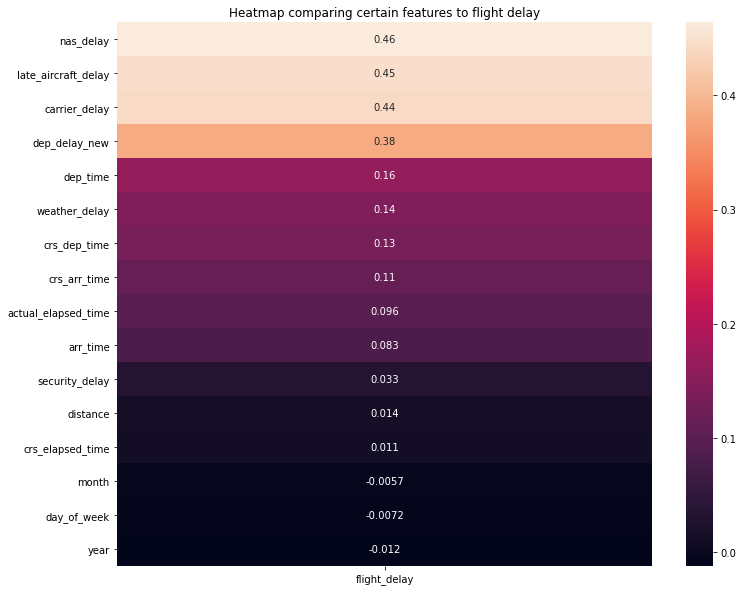

In [317]:
# View heatmap to identify noticeable correlations

delays_subset = delays[['year', 'month', 'day_of_week', 'crs_dep_time', 'dep_time',
                        'dep_delay_new', 'crs_arr_time', 'arr_time', 'crs_elapsed_time', 
                        'actual_elapsed_time', 'distance', 'carrier_delay', 'weather_delay',
                        'nas_delay', 'security_delay', 'late_aircraft_delay', 'flight_delay']]

plt.figure(figsize = (12,10))

sns.heatmap(delays_subset.corr()[['flight_delay']].sort_values('flight_delay', ascending = False)[1:], annot=True)
plt.title('Heatmap comparing certain features to flight delay');

#### Viewing Arrival Delays over Time

In [318]:
delays.head()

,year,month,day_of_week,fl_date,op_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,4,2019-12-19,American,TPA,Tampa,Florida,DFW,Dallas/Fort Worth,Texas,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0,1
1,2019,12,1,2019-12-30,Skywest,MCI,Kansas City,Missouri,SLC,Salt Lake City,Utah,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0,0
2,2019,12,4,2019-12-05,Southwest,LAX,Los Angeles,California,ELP,El Paso,Texas,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0,0
3,2019,12,3,2019-12-11,Delta,RDU,Raleigh/Durham,North Carolina,BOS,Boston,Massachusetts,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0,0
4,2019,12,3,2019-12-18,United,LAX,Los Angeles,California,IAH,Houston,Texas,600,556,0.0,1115,1102,0.0,195.0,186.0,1379.0,0,0,0,0,0,0


In [319]:
delays_time = pd.DataFrame(data = delays, columns = ['fl_date', 'crs_dep_time', 'dep_time', 'dep_delay_new', 'crs_arr_time', 
                                                     'arr_time', 'arr_delay_new', 'crs_elapsed_time', 'actual_elapsed_time',
                                                    'flight_delay'])

In [320]:
delays_time.dtypes

fl_date                 object
crs_dep_time             int64
dep_time                 int64
dep_delay_new          float64
crs_arr_time             int64
arr_time                 int64
arr_delay_new          float64
crs_elapsed_time       float64
actual_elapsed_time    float64
flight_delay             int64
dtype: object

In [321]:
# Change date column to be datetime dtype

delays_time['fl_date'] = pd.to_datetime(delays_time['fl_date'])

In [322]:
# Set flight date to be the index

delays_time.set_index('fl_date', inplace = True)
delays_time.sort_index(inplace = True)

In [323]:
delays_time.head()

,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,flight_delay
fl_date,,,,,,,,,
2018-01-01,1210,1256,46.0,1608,1624,16.0,178.0,148.0,1
2018-01-01,2135,2140,5.0,2345,2314,0.0,250.0,214.0,0
2018-01-01,1725,1721,0.0,1853,1831,0.0,208.0,190.0,0
2018-01-01,1315,1308,0.0,1646,1652,6.0,151.0,164.0,1
2018-01-01,850,902,12.0,1033,1018,0.0,103.0,76.0,0


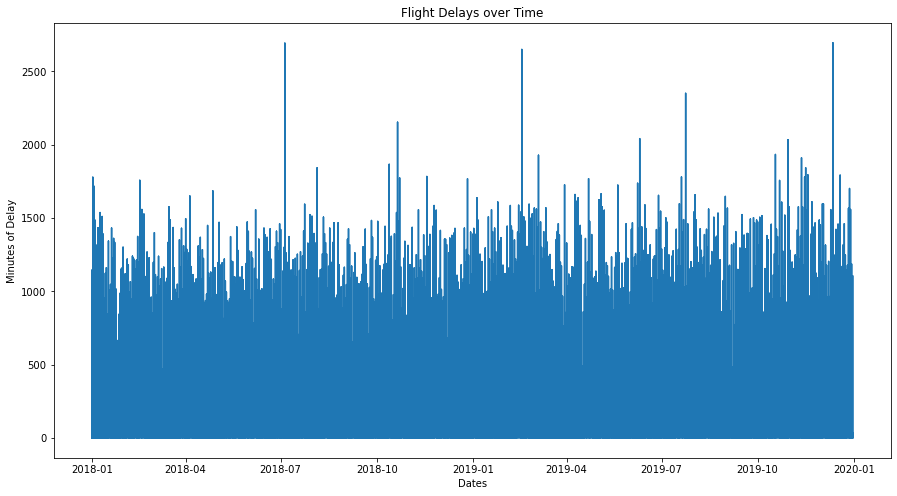

In [415]:
plt.figure(figsize = (15, 8))

plt.plot(delays_time['arr_delay_new'])
plt.title('Flight Delays over Time')
plt.xlabel('Dates')
plt.ylabel('Minutes of Delay')
plt.savefig('../images/delays_over_time.png');

#### Prepare Data File for Export

In [124]:
# Prepare data frame for export

delays = delays.drop(columns = ['fl_date', 'origin_city_name', 'origin_state_nm', 'dest_city_name', 'dest_state_nm'])

In [125]:
delays.to_parquet('../data/cleaned_delays_export_100.parquet')

#### Analysis for Presentation

In [591]:
# Create a dataframe of airline times for analysis

airline_series = delays['op_carrier'].value_counts()
airline_times_df = airline_series.to_frame()
airline_times_df.rename(columns = {'op_carrier': 'number_flights'}, inplace = True)
delay_series = delays_only['op_carrier'].value_counts()
airline_times_df['number_delayed'] = delay_series
airline_times_df['percent_delayed'] = airline_times_df['number_delayed'] / airline_times_df['number_flights']
minutes_series = delays.groupby('op_carrier')['arr_delay_new'].sum()
airline_times_df['number_minutes'] = minutes_series
average_series = delays.groupby('op_carrier')['arr_delay_new'].mean()
airline_times_df['average_minutes'] = average_series

In [592]:
airline_times_df.sort_values(by = 'percent_delayed')

,number_flights,number_delayed,percent_delayed,number_minutes,average_minutes
Delta,1770079,505754,0.285724,18488817.0,10.445193
Endeavor,325197,97527,0.299901,5176706.0,15.918677
Spirit,348292,114867,0.329801,4960879.0,14.243448
Republic,564477,187022,0.331319,7734970.0,13.702897
Hawaiian,142918,49045,0.343169,895752.0,6.267594
Skywest,791940,277553,0.350472,12684690.0,16.017236
United,1182939,420421,0.355404,18619391.0,15.739942
Southwest,2575690,942618,0.365967,27480911.0,10.669339
Alaska,440092,161536,0.367051,4619534.0,10.496746
Mesa,285569,104865,0.367214,4738507.0,16.593212


In [593]:
# Create a dataframe for origin and destination airports

city_series = delays['origin_city_name'].value_counts()
city_df = city_series.to_frame()
city_df.rename(columns = {'origin_city_name': 'origin_num_flights'}, inplace = True)
delay_origin_series = delays_only['origin_city_name'].value_counts()
city_df['origin_city_delays'] = delay_origin_series
city_df['origin_percent_delayed'] = city_df['origin_city_delays'] / city_df['origin_num_flights']
city_df['origin_mins_delayed'] = delays.groupby('origin_city_name')['arr_delay_new'].sum()
city_df['origin_avg_mins'] = delays.groupby('origin_city_name')['arr_delay_new'].mean()
city_df['dest_num_flights'] = delays['dest_city_name'].value_counts()
city_df['dest_city_delays'] = delays_only['dest_city_name'].value_counts()
city_df['dest_percent_delayed'] = city_df['dest_city_delays'] / city_df['dest_num_flights']
city_df['dest_mins_delayed'] = delays.groupby('dest_city_name')['arr_delay_new'].sum()
city_df['dest_avg_mins'] = delays.groupby('dest_city_name')['arr_delay_new'].mean()

In [594]:
city_df.sort_values('origin_percent_delayed')

,origin_num_flights,origin_city_delays,origin_percent_delayed,origin_mins_delayed,origin_avg_mins,dest_num_flights,dest_city_delays,dest_percent_delayed,dest_mins_delayed,dest_avg_mins
Kona,30301,7547,0.249068,188351.0,6.215999,30110,8370,0.277981,166982.0,5.545732
Anchorage,22490,5860,0.260560,164656.0,7.321298,22911,8322,0.363232,209524.0,9.145127
Tucson,36845,10673,0.289673,402521.0,10.924712,36938,14065,0.380773,471809.0,12.772998
Boise,37810,11201,0.296244,395374.0,10.456863,37868,12283,0.324364,405091.0,10.697449
Long Beach,32301,9586,0.296771,327551.0,10.140584,32260,11283,0.349752,380605.0,11.798047
...,...,...,...,...,...,...,...,...,...,...
Newark,260153,106095,0.407818,5367545.0,20.632263,259642,113768,0.438173,6515503.0,25.094180
Sanford,8122,3313,0.407904,116715.0,14.370229,8119,3783,0.465944,184281.0,22.697500
Dallas,131278,54373,0.414182,1669408.0,12.716586,130851,49507,0.378346,1420267.0,10.854078
Chicago,696761,294131,0.422140,11753231.0,16.868382,695498,252021,0.362360,11298119.0,16.244646


In [595]:
# Create a dataframe for months

month_series = delays['month'].value_counts()
month_df = month_series.to_frame()
month_df.rename(columns = {'month': 'num_flights'}, inplace = True)
month_df['num_delays'] = delays_only['month'].value_counts()
month_df['percent_delayed'] = month_df['num_delays'] / month_df['num_flights']
month_df['mins_delayed'] = delays.groupby('month')['arr_delay_new'].sum()
month_df['avg_mins_delayed'] = delays.groupby('month')['arr_delay_new'].mean()

In [596]:
month_df.sort_values(by = 'num_flights')

,num_flights,num_delays,percent_delayed,mins_delayed,avg_mins_delayed
2,854711,317437,0.371397,12239886.0,14.320497
1,931224,308769,0.331573,11805287.0,12.677172
9,969572,286987,0.295993,10429608.0,10.756920
11,977239,325617,0.333201,11011274.0,11.267739
4,986889,337495,0.341979,12874651.0,13.045693
12,998252,364386,0.365024,13097165.0,13.120099
3,1005130,340019,0.338284,11331593.0,11.273759
6,1017589,410218,0.403127,17633746.0,17.328947
5,1022599,373841,0.365579,15088565.0,14.755114
10,1029242,341529,0.331826,11165593.0,10.848365


In [597]:
# Create a dataframe for days

day_series = delays['day_of_week'].value_counts()
day_df = day_series.to_frame()
day_df.rename(columns = {'day_of_week': 'num_flights'}, inplace = True)
day_df['num_delays'] = delays_only['day_of_week'].value_counts()
day_df['percent_delayed'] = day_df['num_delays'] / day_df['num_flights']
day_df['mins_delayed'] = delays.groupby('day_of_week')['arr_delay_new'].sum()
day_df['avg_mins_delayed'] = delays.groupby('day_of_week')['arr_delay_new'].mean()

In [601]:
day_df.sort_values(by = 'percent_delayed')

,num_flights,num_delays,percent_delayed,mins_delayed,avg_mins_delayed
6,1448181,453863,0.313402,16622202.0,11.477987
2,1722245,583819,0.338987,22520655.0,13.076336
7,1687264,583329,0.345725,22691267.0,13.448558
3,1720031,596478,0.346783,22167726.0,12.887981
1,1781091,640644,0.359692,25805453.0,14.488565
5,1773448,672879,0.379419,25757401.0,14.523911
4,1755508,669218,0.381210,26412133.0,15.045293
